# Correlation

Using scatterplots we can often see the relationship between values. Stongly correlated values tend to cluster in defined ways, meaning predicting $y$ is possible for a given $x$. Whereas, uncorrelated values tend to appear random for a given value, meaning predicting $y$ would be difficult given $x$.

The relationship between 

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

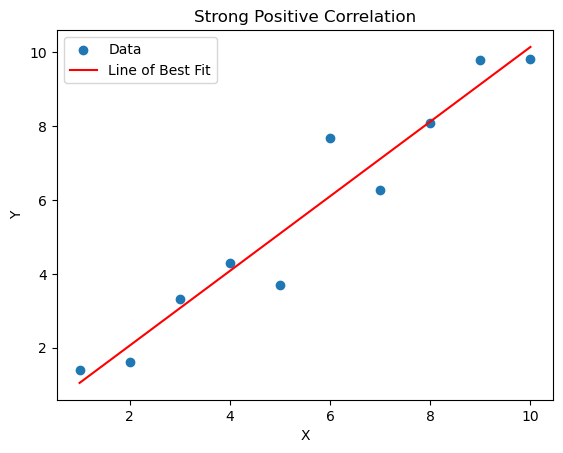

In [79]:
xs = np.arange(1, 11, 1)
std = 1.3
ys = np.sum([std*np.random.randn(10), xs], axis=0)

plt.scatter(xs, ys)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Strong Positive Correlation')
plt.plot(xs, np.poly1d(np.polyfit(xs, ys, 1))(xs), color='red')
plt.legend(['Data', 'Line of Best Fit'])
plt.show()

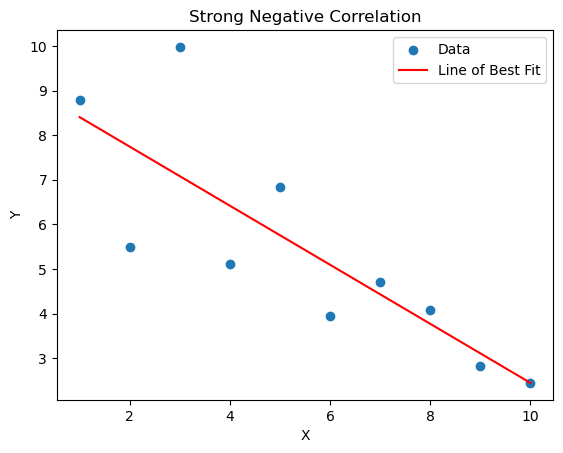

In [80]:
xs = np.arange(1, 11, 1)
std = 1.3
ys = np.sum([std*np.random.randn(10), xs[::-1]], axis=0)

plt.scatter(xs, ys)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Strong Negative Correlation')
plt.plot(xs, np.poly1d(np.polyfit(xs, ys, 1))(xs), color='red')
plt.legend(['Data', 'Line of Best Fit'])
plt.show()

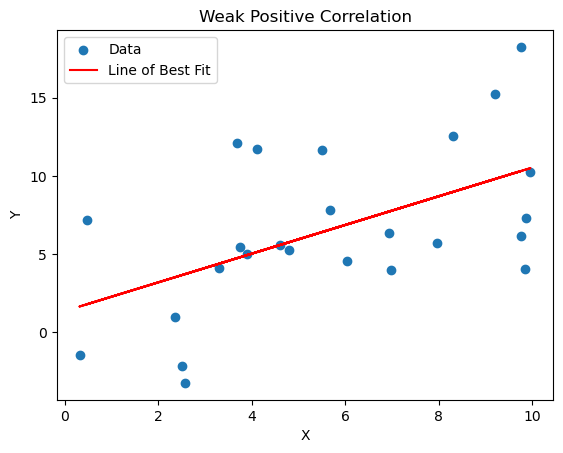

In [81]:
n = 25
xs = 10*np.random.random(n)
std = 4
ys = np.sum([std*np.random.randn(n), xs], axis=0)

plt.scatter(xs, ys)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Weak Positive Correlation')
plt.plot(xs, np.poly1d(np.polyfit(xs, ys, 1))(xs), color='red')
plt.legend(['Data', 'Line of Best Fit'])
plt.show()

### Correlation Coefficient - Pearson's r

$$r = \frac{\text{cov}(X, Y)}{S_x\cdot S_y} = \frac{\text{cov}_{X,Y}}{S_x\cdot S_y}$$

We can think of $r$ as the proportion $X$ and $Y$ vary together compared to their total, independent variations.

Note that $r$ is not a percentage. However, $r^2$ is the percent (%) variation in $Y$ explained by the variation in $X$. $r^2$ is called the *coefficient of determination*.

For data that falls perfectly on a positively sloped line, $r=1$. For data that falls perfectly on a negatively sloped line, $r=-1$. For data that is perfectly uncorrelated, $r=0$. The greater the value of $\lvert r \rvert$, the greater the correlation.

### Example

In [90]:
df = pd.read_csv('./Data/Correlations-Lesson-14.csv')
print('df.shape:', df.shape)
df.head()

df.shape: (61, 9)


,dentist,temp,age,year,pets,eggs,icons,emails,party
0,1,30.0,26,1987,0,0,8,0,30
1,10,10.0,69,1944,0,0,8,0,0
2,10,20.0,39,1974,1,0,34,500,60
3,5,NaN,26,1987,0,12,22,1267,0
4,3,15.0,31,1982,0,3,28,1,30


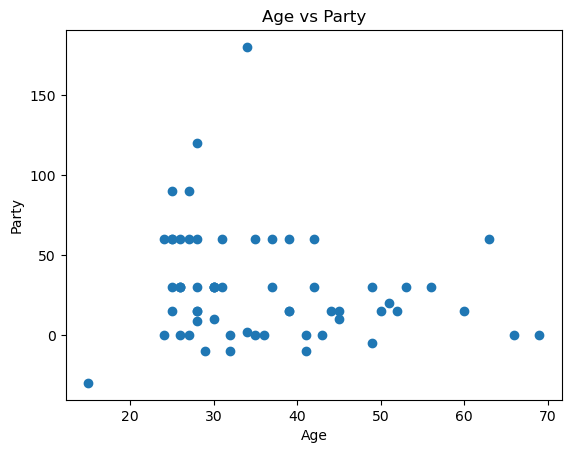

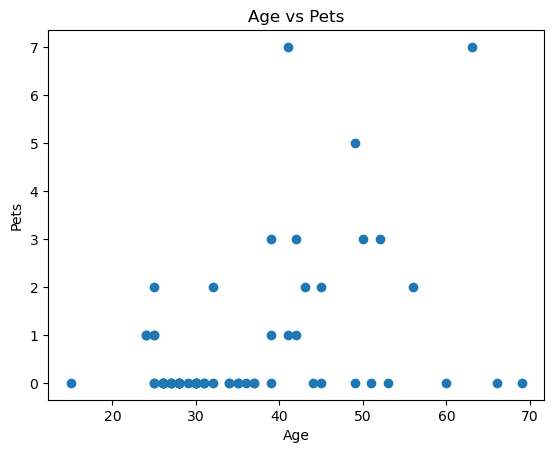

In [83]:
plt.scatter(df['age'], df['party'])
plt.xlabel('Age')
plt.ylabel('Party')
plt.title('Age vs Party')
plt.show()

plt.scatter(df['age'], df['pets'])
plt.xlabel('Age')
plt.ylabel('Pets')
plt.title('Age vs Pets')
plt.show()

In [85]:
print('Age vs Party, r:', stats.pearsonr(df['age'], df['party'])[0])
print('Age vs Pets, r:', stats.pearsonr(df['age'], df['pets'])[0])

Age vs Party, r: -0.16421412606556712
Age vs Pets, r: 0.37576461379834136


### Hypothesis Testing for $\rho$

As we've seen while conducting hypothesis testing, it is possible that the sample mean and population mean differ due to chance. Similarly, just because it appears like there might be a relationship between two values, they may not actually be correlated (or vice-versa, the population data is correlated but the sample is not). This is known as sampling error. Once way we can reduce sampling error is by increasing the sample size.

How much variation is allowable before we decide that our results are not due to chance? Here, we go back to hypothesis testing where $\rho = \text{true correlation for population}$. $$\begin{align}H_0: &\rho=0\\ H_A: &\rho \lt 0 \\ &\rho \gt 0 \\ &\rho\neq 0 \end{align}$$

To determine if a result is significant, we will also again use t-tests. $$t = \frac{r\sqrt{N-2}}{\sqrt{1-r^2}}$$
If $N=25$ is the number of participants, $df=N-2=23$. For $\alpha=0.05$, $t^*=1.714$  
If $t=2.71$, there is enough evidence to reject $H_0$ given the significant relationship beween $x$ and $y$.

##### Confindence Intervals

We can also compute CI to determine if a $r$ is within it. 

In [87]:
print('age vs party, CI: ', stats.pearsonr(df['age'], df['party']).confidence_interval(0.95))
print('age vs pets, CI: ', stats.pearsonr(df['age'], df['pets']).confidence_interval(0.95))

age vs party, CI:  ConfidenceInterval(low=-0.3995139552099432, high=0.09138563966006734)
age vs pets, CI:  ConfidenceInterval(low=0.13689788096876582, high=0.5733334865922902)


In the 'age vs party' example, we see that the CI includes 0. Thus, we fail to rejec $H_0$.  
However, i the 'age vs pets' exmaple, we can reject the $H_0 as $\rho \gt 0$

##### Computing $\rho$

Using the $r$ values alrady computed, in 'age vs party', we find $t=-1.2787$ and $df=59$. In 'age vs pets', we find $t=3.1146$, $df=59$.
Computer $\rho$ for both sets of values.